In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/DATA/

/content/drive/MyDrive/DATA


In [ ]:
earning = pd.read_csv("서울추정매출.csv", encoding = 'euc_kr')
visitor = pd.read_csv("서울생활.csv", encoding = 'euc-kr')
worker = pd.read_csv("서울직장.csv",encoding = 'euc-kr')
resident = pd.read_csv("서울상주.csv",encoding = 'euc-kr')
area = pd.read_csv("상권영역.csv", encoding = 'euc-kr')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
earning

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,9548586,2264,66,34,11,11,11,11,22,19,15,0,0,20,38,40,1,4,96,10,63,18,5,4,1,6305806,3242780,1088213,1039632,1020200,1093071,2064690,1804783,1437997,0,0,1928664,3670291,3833037,116594,414231,9134355,957544,6024269,1683948,468040,351630,63155,1493,771,272,259,209,271,482,422,349,0,0,442,878,915,29,102,2162,225,1414,409,118,83,15,6
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,103492276,370,100,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,0,0,0,100,0,103492276,0,0,103492276,0,0,0,0,0,0,0,103492276,0,0,0,103492276,0,0,0,0,0,103492276,0,370,0,0,370,0,0,0,0,0,0,0,370,0,0,0,370,0,0,0,0,0,370,0,4
2,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,55855797,130,100,0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,100,0,0,0,55855797,0,0,0,55855797,0,0,0,0,0,0,0,55855797,0,0,0,55855797,0,0,55855797,0,0,0,130,0,0,0,130,0,0,0,0,0,0,0,130,0,0,0,130,0,0,130,0,0,0,6
3,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,8443170204,4794,50,50,12,10,9,6,13,23,27,0,12,27,35,26,0,51,49,0,3,9,21,22,45,4215188146,4227982058,978751765,849755313,714767223,541608872,1130304973,1937766368,2290215690,0,1007652609,2285528114,2962688993,2187300488,0,4274047183,4169123021,0,236141046,779970347,1779869072,1866924054,3780265685,2748,2046,599,458,353,669,669,1023,1023,0,564,1340,1834,1056,0,2151,2643,0,105,388,987,1164,2150,6
4,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,576420408,8392,73,27,7,13,8,24,22,11,16,0,5,33,34,28,0,69,31,0,21,31,30,10,9,423123457,153296951,40289384,72484368,46921785,135334239,128093681,63890880,89406071,0,27953322,191437167,196090767,160880979,58173,287529684,129869311,698075,85940201,129354035,123565972,41541851,36298860,5529,2863,546,1070,909,1481,1523,1153,1710,0,520,2392,2806,2668,6,4326,3023,72,1757,2508,1961,650,398,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102968,2022,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,46710839,136,100,0,59,5,15,15,7,0,0,0,0,10,70,20,0,73,27,0,0,0,86,15,0,46710839,0,27568280,2181261,6780220,6766687,3414391,0,0,0,0,4609308,32710166,9391365,0,33921005,12789834,0,0,0,39944152,6766687,0,136,0,80,8,24,16,8,0,0,0,0,16,96,24,0,96,40,0,0,0,120,16,0,3
102969,2022,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,20931521,2018,67,33,10,13,16,15,13,18,15,0,4,40,48,8,0,47,53,0,19,16,20,31,15,14003819,6927702,1986869,2764282,3330050,3172306,2750312,3744889,3182813,0,852668,8291970,10112456,1674427,0,9462217,10691243,0,3795504,3132878,3986639,6184112,3054328,1327,691,191,259,290,312,275,364,327,0,121,754,975,168,0,955,1009,0,382,342,380,581,279,*
102970,2022,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,5119924,159,40,60,15,17,0,0,8,33,28,0,0,0,40,48,12,81,19,0,0,19,9,35,38,2028482,3091442,761788,876942,0,0,389752,1665304,1426138,0,0,0,2055056,2471382,593486,3295176,761788,0,0,761788,363178,

In [ ]:
useless = earning[earning['점포수']=='*'].index
earning = earning.drop(useless)
df = pd.merge(earning, area, how = 'inner')
df

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,9548586,2264,66,34,11,11,11,11,22,19,15,0,0,20,38,40,1,4,96,10,63,18,5,4,1,6305806,3242780,1088213,1039632,1020200,1093071,2064690,1804783,1437997,0,0,1928664,3670291,3833037,116594,414231,9134355,957544,6024269,1683948,468040,351630,63155,1493,771,272,259,209,271,482,422,349,0,0,442,878,915,29,102,2162,225,1414,409,118,83,15,6,202112,205310,445727,11680,11680580,NaN
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,103492276,370,100,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,0,0,0,100,0,103492276,0,0,103492276,0,0,0,0,0,0,0,103492276,0,0,0,103492276,0,0,0,0,0,103492276,0,370,0,0,370,0,0,0,0,0,0,0,370,0,0,0,370,0,0,0,0,0,370,0,4,202112,205310,445727,11680,11680580,NaN
2,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,55855797,130,100,0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,100,0,0,0,55855797,0,0,0,55855797,0,0,0,0,0,0,0,55855797,0,0,0,55855797,0,0,55855797,0,0,0,130,0,0,0,130,0,0,0,0,0,0,0,130,0,0,0,130,0,0,130,0,0,0,6,202112,205310,445727,11680,11680580,NaN
3,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,8443170204,4794,50,50,12,10,9,6,13,23,27,0,12,27,35,26,0,51,49,0,3,9,21,22,45,4215188146,4227982058,978751765,849755313,714767223,541608872,1130304973,1937766368,2290215690,0,1007652609,2285528114,2962688993,2187300488,0,4274047183,4169123021,0,236141046,779970347,1779869072,1866924054,3780265685,2748,2046,599,458,353,669,669,1023,1023,0,564,1340,1834,1056,0,2151,2643,0,105,388,987,1164,2150,6,202112,205310,445727,11680,11680580,NaN
4,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,576420408,8392,73,27,7,13,8,24,22,11,16,0,5,33,34,28,0,69,31,0,21,31,30,10,9,423123457,153296951,40289384,72484368,46921785,135334239,128093681,63890880,89406071,0,27953322,191437167,196090767,160880979,58173,287529684,129869311,698075,85940201,129354035,123565972,41541851,36298860,5529,2863,546,1070,909,1481,1523,1153,1710,0,520,2392,2806,2668,6,4326,3023,72,1757,2508,1961,650,398,5,202112,205310,445727,11680,11680580,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70620,2022,1,A,골목상권,2110628,신목동역,CS200028,미용실,28586759,1139,58,42,0,18,10,16,15,15,27,0,4,22,40,34,0,61,39,0,24,32,18,17,10,16697194,11889565,13743,5158330,2789023,4518432,4217666,4264829,7624736,0,1152738,6304982,11466773,9662266,0,17431417,11155342,0,6731988,9207709,5022776,4835262,2789024,706,433,5,240,124,213,124,143,290,0,69,298,356,416,0,858,281,0,184,422,233,198,102,3,202112,189375,449531,11470,11470520,NaN
70621,2022,1,A,골목상권,2110628,신목동역,CS100010,커피-음료,2396503,130,100,0,21,35,0,11,32,0,0,0,0,47,34,19,0,46,54,0,35,5,19,41,0,2396503,0,511686,848491,0,272035,764291,0,0,0,0,1120527,822584,453392,0,861446,1023371,0,660657,97156,362714,764290,0,130,0,13,52,0,26,39,0,0

In [ ]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
hello = df[['상권_코드_명','행정동_코드','시군구_코드','서비스_업종_코드_명','분기당_매출_금액']]
hello.to_csv("hello")

In [ ]:
age = df[['상권_코드_명','행정동_코드','시군구_코드','서비스_업종_코드_명','분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액','남성_매출_금액','여성_매출_금액']]

# 성별 선호 업종

In [ ]:
gender = df[['상권_코드_명','행정동_코드','시군구_코드','서비스_업종_코드_명','남성_매출_금액','여성_매출_금액','점포수']]
gender.head(4)

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
0,강남 마이스 관광특구,11680580,11680,전자상거래업,414231,9134355,6
1,강남 마이스 관광특구,11680580,11680,인테리어,103492276,0,4
2,강남 마이스 관광특구,11680580,11680,가전제품,0,55855797,6
3,강남 마이스 관광특구,11680580,11680,가구,4274047183,4169123021,6


In [ ]:
gender = gender[(gender['행정동_코드']==11290555)]
gender

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
7829,돈암시장(돈암제일시장),11290555,11290,일반의류,6373280,30005569,8
7830,돈암시장(돈암제일시장),11290555,11290,반찬가게,314205613,907821111,9
7831,돈암시장(돈암제일시장),11290555,11290,청과상,291686341,549568204,5
7832,돈암시장(돈암제일시장),11290555,11290,수산물판매,309465360,576747778,5
7833,돈암시장(돈암제일시장),11290555,11290,육류판매,279300150,580933013,6
...,...,...,...,...,...,...,...
61807,한성대입구역 3번,11290555,11290,치킨전문점,28140662,16183870,5
61808,한성대입구역 3번,11290555,11290,패스트푸드점,44104490,30632127,8
61809,한성대입구역 3번,11290555,11290,제과점,1625297,1634810,3
61810,한성대입구역 3번,11290555,11290,일식음식점,65015200,40725156,6


In [ ]:
q1=gender['남성_매출_금액'].quantile(0.25)
q2=gender['남성_매출_금액'].quantile(0.5)
q3=gender['남성_매출_금액'].quantile(0.75)
iqr=q3-q1
condition=gender['남성_매출_금액']>q3+1.5*iqr
gender[condition]


h=gender[condition].index
gender.drop(h,inplace=True)
gender

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
7829,돈암시장(돈암제일시장),11290555,11290,일반의류,6373280,30005569,8
7830,돈암시장(돈암제일시장),11290555,11290,반찬가게,314205613,907821111,9
7831,돈암시장(돈암제일시장),11290555,11290,청과상,291686341,549568204,5
7832,돈암시장(돈암제일시장),11290555,11290,수산물판매,309465360,576747778,5
7833,돈암시장(돈암제일시장),11290555,11290,육류판매,279300150,580933013,6
...,...,...,...,...,...,...,...
61807,한성대입구역 3번,11290555,11290,치킨전문점,28140662,16183870,5
61808,한성대입구역 3번,11290555,11290,패스트푸드점,44104490,30632127,8
61809,한성대입구역 3번,11290555,11290,제과점,1625297,1634810,3
61810,한성대입구역 3번,11290555,11290,일식음식점,65015200,40725156,6


In [ ]:
gender1 = gender

In [ ]:
q4=gender['여성_매출_금액'].quantile(0.25)
q5=gender['여성_매출_금액'].quantile(0.5)
q6=gender['여성_매출_금액'].quantile(0.75)
iqr2=q6-q4
condition1=gender['여성_매출_금액']>q6+1.5*iqr2
gender[condition1]

i=gender[condition1].index
gender1.drop(i,inplace=True)

In [ ]:
gender1

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
7829,돈암시장(돈암제일시장),11290555,11290,일반의류,6373280,30005569,8
7834,돈암시장(돈암제일시장),11290555,11290,미곡판매,263163943,365912673,3
7836,돈암시장(돈암제일시장),11290555,11290,미용실,13495615,10504385,4
7837,돈암시장(돈암제일시장),11290555,11290,한의원,159038687,347610150,4
7839,돈암시장(돈암제일시장),11290555,11290,스포츠 강습,27911717,190562649,3
...,...,...,...,...,...,...,...
61807,한성대입구역 3번,11290555,11290,치킨전문점,28140662,16183870,5
61808,한성대입구역 3번,11290555,11290,패스트푸드점,44104490,30632127,8
61809,한성대입구역 3번,11290555,11290,제과점,1625297,1634810,3
61810,한성대입구역 3번,11290555,11290,일식음식점,65015200,40725156,6


In [ ]:
makeup = gender1[(gender1['서비스_업종_코드_명']== '화장품')]
makeup

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
67555,성원중학교,11200650,11200,화장품,210916,2102599,7
67593,성원중학교,11200650,11200,화장품,1988612,2461882,7
67631,성원중학교,11200650,11200,화장품,2309247,1937025,7


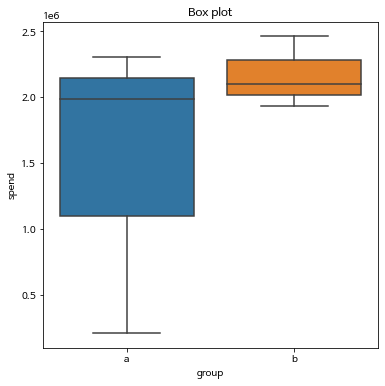

In [ ]:
import seaborn as sns
from scipy.stats import shapiro


a = makeup['남성_매출_금액'].tolist()
b = makeup['여성_매출_금액'].tolist()
group = ['a']*3 + ['b']*3
data = pd.DataFrame({'group':group, 'spend':a+b})

plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='spend', data=data)
plt.title('Box plot')
plt.show()

In [ ]:
normal1 = shapiro(a)
normal2 = shapiro(b)
print(normal1, normal2)

ShapiroResult(statistic=0.8615298271179199, pvalue=0.2717934250831604) ShapiroResult(statistic=0.9565678238868713, pvalue=0.599037766456604)


In [ ]:
from scipy.stats import levene, ttest_ind
print(levene(a,b))
ttest_ind(a,b)

LeveneResult(statistic=0.8873814790407597, pvalue=0.3995249591350066)


Ttest_indResult(statistic=-0.990319685492086, pvalue=0.37807710922535265)

In [ ]:
# 화장품 -> 유의미한 차이가 아니다

In [ ]:
fix = gender1[(gender1['서비스_업종_코드_명']== '가전제품수리')]
fix

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
67568,성원중학교,11200650,11200,가전제품수리,1218261,134711,3
67606,성원중학교,11200650,11200,가전제품수리,1106977,486133,3
67644,성원중학교,11200650,11200,가전제품수리,4769376,4689712,3


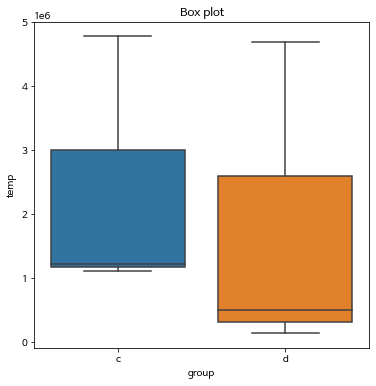

In [ ]:
c = fix['남성_매출_금액'].tolist()
d = fix['여성_매출_금액'].tolist()
group = ['c']*3 + ['d']*3
data = pd.DataFrame({'group':group, 'temp':c+d})

plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [ ]:
normal3 = shapiro(c)
normal4 = shapiro(d)
print(normal3, normal4)

ShapiroResult(statistic=0.7727674841880798, pvalue=0.05101945251226425) ShapiroResult(statistic=0.8074922561645508, pvalue=0.13251201808452606)


In [ ]:
from scipy.stats import levene, ttest_ind
print(levene(c,d))
ttest_ind(c,d)

LeveneResult(statistic=0.02791267360200896, pvalue=0.8754202080875393)


Ttest_indResult(statistic=0.31396634457647693, pvalue=0.7692391406684843)

In [ ]:
#가전제품수리 -> 유의미한 차이가 아니다

In [ ]:
clean = gender1[(gender1['서비스_업종_코드_명']== '세탁소')]
clean

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
67569,성원중학교,11200650,11200,세탁소,8233993,2887492,6
67607,성원중학교,11200650,11200,세탁소,5969586,11172537,6
67645,성원중학교,11200650,11200,세탁소,5437584,2280547,6


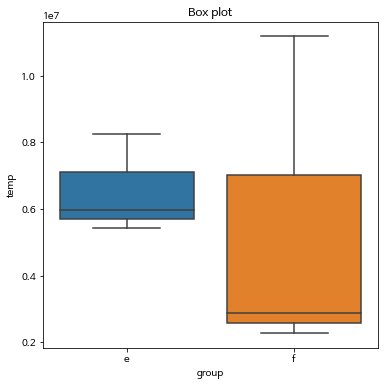

In [ ]:
e = clean['남성_매출_금액'].tolist()
f = clean['여성_매출_금액'].tolist()
group = ['e']*3 + ['f']*3
data = pd.DataFrame({'group':group, 'temp':e+f})

plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [ ]:
normal5 = shapiro(e)
normal6 = shapiro(f)
print(normal5, normal6)

ShapiroResult(statistic=0.8865788578987122, pvalue=0.34397053718566895) ShapiroResult(statistic=0.8009383678436279, pvalue=0.11673929542303085)


In [ ]:
print(levene(e,f))
ttest_ind(e,f)

LeveneResult(statistic=0.5449093799392895, pvalue=0.5013705362631399)


Ttest_indResult(statistic=0.3675173237520657, pvalue=0.7318528860218804)

In [ ]:
# 세탁소 -> 유의미한 차이가 아니다

In [ ]:
sports = gender1[(gender1['서비스_업종_코드_명']== '스포츠 강습')]
sports

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
67575,성원중학교,11200650,11200,스포츠 강습,33460741,30251869,6
67613,성원중학교,11200650,11200,스포츠 강습,25018371,38038054,6
67652,성원중학교,11200650,11200,스포츠 강습,21066034,40596901,6


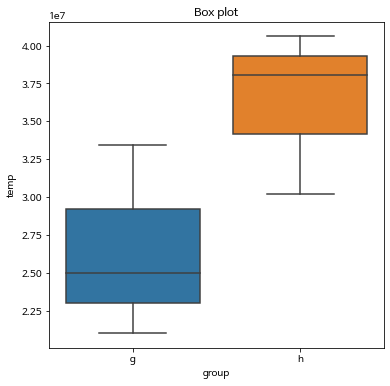

In [ ]:
g = sports['남성_매출_금액'].tolist()
h = sports['여성_매출_금액'].tolist()
group = ['g']*3 + ['h']*3
data = pd.DataFrame({'group':group, 'temp':g+h})

plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [ ]:
normal7 = shapiro(g)
normal8 = shapiro(h)
print(normal7, normal8)

ShapiroResult(statistic=0.9580907225608826, pvalue=0.6062335968017578) ShapiroResult(statistic=0.9215660691261292, pvalue=0.4578716456890106)


In [ ]:
print(levene(g,h))
ttest_ind(g,h)

LeveneResult(statistic=0.041688090449024086, pvalue=0.8481831032749456)


Ttest_indResult(statistic=-2.0376278221715394, pvalue=0.11124323403220034)

In [ ]:
# 스프초 강습 -> 유의미한 차이가 아니다

In [ ]:
electric = gender1[(gender1['서비스_업종_코드_명']== '전자상거래업')]
electric

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,점포수
67549,성원중학교,11200650,11200,전자상거래업,6753037,53342393,22
67587,성원중학교,11200650,11200,전자상거래업,20589063,102388733,23
67626,성원중학교,11200650,11200,전자상거래업,8204830,45681705,23


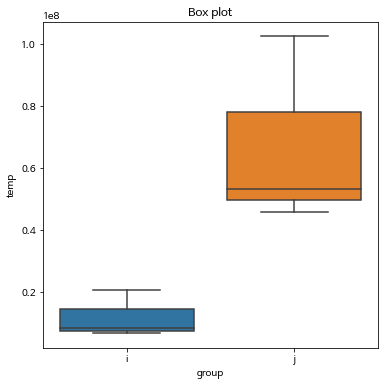

In [ ]:
i = electric['남성_매출_금액'].tolist()
j = electric['여성_매출_금액'].tolist()
group = ['i']*3 + ['j']*3
data = pd.DataFrame({'group':group, 'temp':i+j})

plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [ ]:
normal9 = shapiro(i)
normal10 = shapiro(j)
print(normal9, normal10)

ShapiroResult(statistic=0.8277400732040405, pvalue=0.18260006606578827) ShapiroResult(statistic=0.849225640296936, pvalue=0.23838038742542267)


In [ ]:
print(levene(i,j))
ttest_ind(i,j)

LeveneResult(statistic=0.8256622020708313, pvalue=0.4149262459508721)


Ttest_indResult(statistic=-3.0215352759259932, pvalue=0.03910420028668632)

In [ ]:
#차이가 유의미 할 때

In [ ]:
gender12 = gender1.groupby(['서비스_업종_코드_명'])['남성_매출_금액'].sum().sort_values()
gender12.to_csv("gender12")

In [ ]:
gender13 = gender1.groupby(['서비스_업종_코드_명'])['여성_매출_금액'].sum().sort_values()
gender13.to_csv("gender13")

In [ ]:
gender12d = pd.read_csv("gender12")
gender13d = pd.read_csv("gender13")

In [ ]:
genderNew1 = pd.merge(gender12d, gender13d)

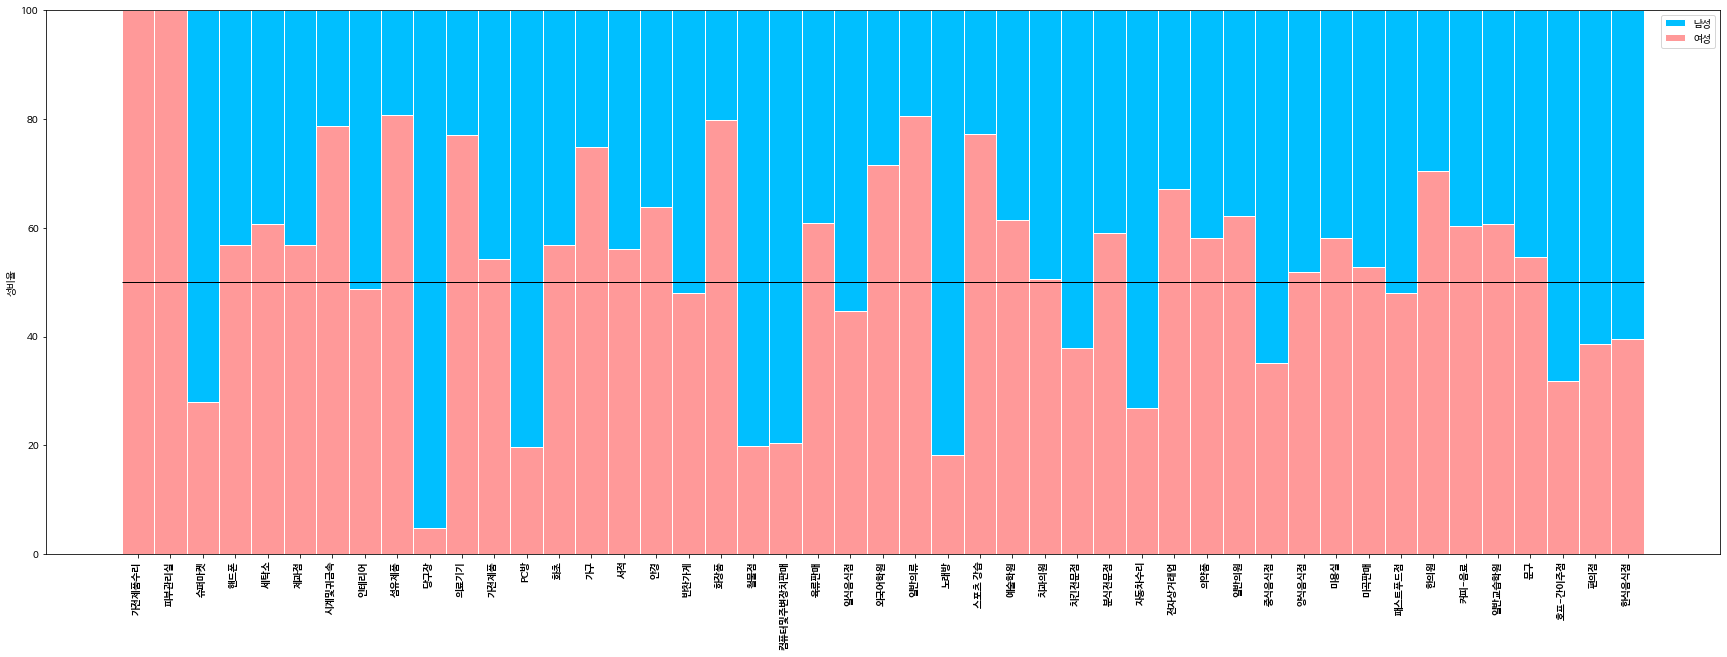

In [ ]:
서비스 = np.array(genderNew1['서비스_업종_코드_명'])
남성 = np.array(genderNew1['남성_매출_금액'])
여성 = np.array(genderNew1['여성_매출_금액'])

total = 남성+여성
proportion_남성 = np.true_divide(남성, total) * 100
proportion_여성 = np.true_divide(여성, total) * 100



#add colors
colors = ['#00BFFF','#FF9999']
# The position of the bars on the x-axis
r = range(len(서비스))
barWidth = 1
#plot bars
plt.figure(figsize=(30,10))
ax1 = plt.bar(r, proportion_남성, bottom=proportion_여성, color=colors[0], edgecolor='white', width=barWidth, label="남성")
ax2 = plt.bar(r, proportion_여성, color=colors[1], edgecolor='white', width=barWidth, label='여성')

plt.hlines(50, -0.5, 46.5, color='black', linestyle='solid', linewidth=1)

plt.legend()
plt.xticks(r, 서비스, fontweight='bold', rotation = 90)
plt.ylabel("성비율")
plt.savefig("percentileStacked.png")
plt.show()

# 여성 VS 남성 - 성수1가1동

In [ ]:
menwomen = age[(age['행정동_코드']==11200650)]
#11200650 11200615 11200590

In [ ]:
menwomen

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,분기당_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,남성_매출_금액,여성_매출_금액
30558,서울숲역,11200650,11200,전자상거래업,1819649159,0,0,1002817386,212140549,116949277,487741947,826350899,993298260
30559,서울숲역,11200650,11200,화장품,1785956982,1741103,33255073,79423327,1114935785,195525896,361075798,240852618,1545104364
30560,서울숲역,11200650,11200,일반의류,731423328,20996192,522049306,167381638,20996192,0,0,576639405,154783923
30561,서울숲역,11200650,11200,편의점,572245144,4540279,144615348,193672103,99238904,60615907,29919371,321897062,210704850
30562,서울숲역,11200650,11200,슈퍼마켓,165000000,495303,61002979,54470674,14791300,12927997,11477761,50851582,104314433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67679,성수1가1동주민센터,11200650,11200,분식전문점,175683425,1463855,26143080,44523212,35415665,32006976,9543878,83688379,65408287
67680,성수1가1동주민센터,11200650,11200,한식음식점,187807555,57487,11914018,24584703,23791976,33477348,21689633,87119688,28395478
67681,서울숲역 1번,11200650,11200,커피-음료,110462751,1567851,38750025,30818039,15871292,8200411,4831667,34324963,65714322
67682,서울숲역 1번,11200650,11200,커피-음료,123993247,1600875,42758936,35075026,17719512,9117689,4546705,39509328,71309415


In [ ]:
m = menwomen.groupby(['상권_코드_명'])['남성_매출_금액'].sum().sort_values()
m1 = menwomen.groupby(['상권_코드_명'])['여성_매출_금액'].sum().sort_values()


print(m)
print(m1)

상권_코드_명
서울숲역 1번         103874506
성수1가1동주민센터     2303590523
서울숲역           8953376410
성원중학교         20524317867
Name: 남성_매출_금액, dtype: int64
상권_코드_명
서울숲역 1번         189059929
성수1가1동주민센터     1986966357
서울숲역          11112595856
성원중학교         14949132772
Name: 여성_매출_금액, dtype: int64


In [ ]:
dat_m = [103874506,189059929]
dat_m1 = [2303590523,1986966357]
dat_m2 = [8953376410,11112595856]
dat_m3 = [20524317867,14949132772]

sex = ['male','female']

i = pd.DataFrame({'서울숲역 1번':[103874506,189059929],
                             '서울숲역':[8953376410,11112595856],
                             '성수1가1동주민센터':[2303590523,1986966357],
                  '성원중학교': [20524317867,14949132772]
                  }, index = sex)


i

,서울숲역 1번,서울숲역,성수1가1동주민센터,성원중학교
male,103874506,8953376410,2303590523,20524317867
female,189059929,11112595856,1986966357,14949132772


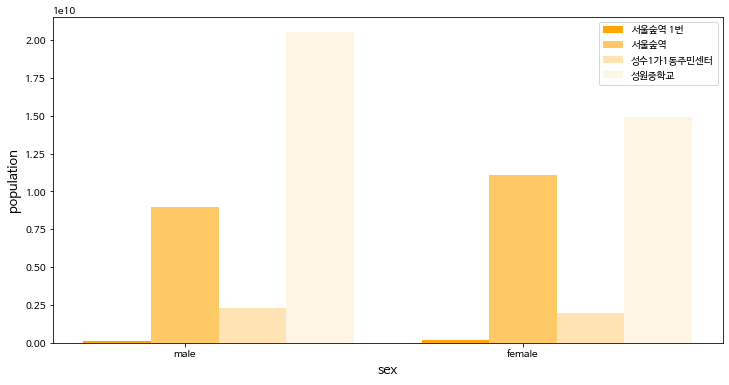

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.20

index = np.arange(2)

b1 = plt.bar(index, i['서울숲역 1번'], bar_width, alpha=1.0, color='orange', label='서울숲역 1번')

b2 = plt.bar(index + bar_width, i['서울숲역'], bar_width, alpha=0.6, color='orange', label='서울숲역')

b3 = plt.bar(index + 2 * bar_width, i['성수1가1동주민센터'], bar_width, alpha=0.3, color='orange', label='성수1가1동주민센터')

b4 = plt.bar(index + 3 * bar_width, i['성원중학교'], bar_width, alpha=0.1, color='orange', label='성원중학교')

plt.xticks(np.arange(bar_width, 2 + bar_width, 1), sex)

plt.xlabel('sex', size = 13)
plt.ylabel('population', size = 13)
plt.legend()
plt.show()

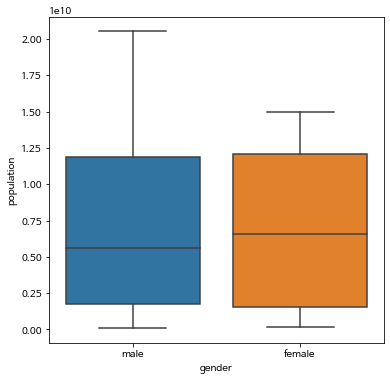

In [ ]:
male = [103874506,8953376410,2303590523,20524317867]
female = [189059929,11112595856,1986966357,14949132772]
gender = ['male', 'female']
gender = [gender[j] for j in range(2) for i in range(4)]
data = pd.DataFrame({'gender':gender, 'population':male+female})


plt.figure(figsize=(6,6))
sns.boxplot(x='gender', y='population', data=data)

In [ ]:
normal11 = shapiro(k)
normal12 = shapiro(l)
print(normal11, normal12)

ShapiroResult(statistic=0.9076184034347534, pvalue=0.46987515687942505) ShapiroResult(statistic=0.8970677852630615, pvalue=0.41664063930511475)


In [ ]:
print(levene(k,l))
ttest_ind(k,l)

LeveneResult(statistic=0.07505897874525251, pvalue=0.7932960921595579)


Ttest_indResult(statistic=0.15712047725396186, pvalue=0.8803038226519511)

# 여성 VS 남성 - 삼선동

In [ ]:
menwomen1 = age[(age['행정동_코드']==11290555)]
menwomen1

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,분기당_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,남성_매출_금액,여성_매출_금액
7829,돈암시장(돈암제일시장),11290555,11290,일반의류,36378849,0,2164439,1823933,2546714,10353138,19490625,6373280,30005569
7830,돈암시장(돈암제일시장),11290555,11290,반찬가게,1222026724,0,23078533,65521826,160440483,693153531,279832351,314205613,907821111
7831,돈암시장(돈암제일시장),11290555,11290,청과상,865729966,438492,33888100,72333457,149280574,268303110,317010814,291686341,549568204
7832,돈암시장(돈암제일시장),11290555,11290,수산물판매,953888208,0,15982882,35583995,66840373,242666456,525139435,309465360,576747778
7833,돈암시장(돈암제일시장),11290555,11290,육류판매,921842929,369550,32017721,52352137,119972646,292035289,363485820,279300150,580933013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61807,한성대입구역 3번,11290555,11290,치킨전문점,44633312,1239206,7866994,7568182,11833084,9913411,5903655,28140662,16183870
61808,한성대입구역 3번,11290555,11290,패스트푸드점,76346061,888679,14688571,12355529,18025924,16433491,12344422,44104490,30632127
61809,한성대입구역 3번,11290555,11290,제과점,3260107,27718,540412,489154,722885,978953,500985,1625297,1634810
61810,한성대입구역 3번,11290555,11290,일식음식점,121593479,1200323,19344058,21296273,19666249,26399216,17834237,65015200,40725156


In [ ]:
m2 = menwomen1.groupby(['상권_코드_명'])['남성_매출_금액'].sum().sort_values()
m3 = menwomen1.groupby(['상권_코드_명'])['여성_매출_금액'].sum().sort_values()

print(m2)
print(m3)

상권_코드_명
삼선중학교            4247405887
경동고등학교           4840715930
한성대입구역 3번        7615994614
성북구청             8820235786
돈암시장(돈암제일시장)    13045964711
한성대입구역          26148178022
Name: 남성_매출_금액, dtype: int64
상권_코드_명
경동고등학교           3326873915
삼선중학교            4430077942
한성대입구역 3번        6910480609
성북구청             8280222661
돈암시장(돈암제일시장)    19842271285
한성대입구역          33798831542
Name: 여성_매출_금액, dtype: int64


In [ ]:
dat_m4 = [4247405887,4430077942]
dat_m5 = [4840715930,3326873915]
dat_m6 = [7615994614,6910480609]
dat_m7 = [8820235786,8280222661]
dat_m8 = [13045964711,19842271285]
dat_m9 = [26148178022,33798831542]

sex = ['male','female']

q = pd.DataFrame({'삼선중학교':[4247405887,4430077942],
                             '경동고등학교':[4840715930,3326873915],
                             '한성대입구역 3번':[7615994614,6910480609],
                  '성북구청': [8820235786,8280222661],
                  '돈암시장(돈암제일시장)': [13045964711,19842271285],
                  '한성대입구역': [26148178022,33798831542]
                  }, index = sex)


q

,삼선중학교,경동고등학교,한성대입구역 3번,성북구청,돈암시장(돈암제일시장),한성대입구역
male,4247405887,4840715930,7615994614,8820235786,13045964711,26148178022
female,4430077942,3326873915,6910480609,8280222661,19842271285,33798831542


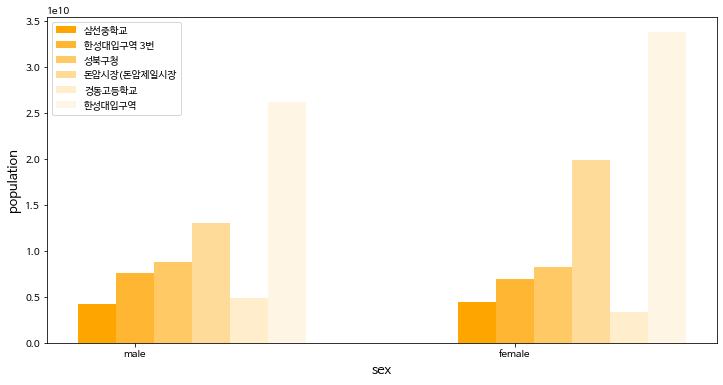

In [ ]:
import seaborn
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.10

index = np.arange(2)

b1 = plt.bar(index, q['삼선중학교'], bar_width, alpha=1.0, color='orange', label='삼선중학교')

b2 = plt.bar(index + bar_width, q['한성대입구역 3번'], bar_width, alpha=0.8, color='orange', label='한성대입구역 3번')

b3 = plt.bar(index + 2 * bar_width, q['성북구청'], bar_width, alpha=0.6, color='orange', label='성북구청')

b4 = plt.bar(index + 3 * bar_width, q['돈암시장(돈암제일시장)'], bar_width, alpha=0.4, color = 'orange', label='돈암시장(돈암제일시장')

b5 = plt.bar(index + 4 * bar_width, q['경동고등학교'], bar_width, alpha=0.2, color = 'orange', label='경동고등학교')

b6 = plt.bar(index + 5 * bar_width, q['한성대입구역'], bar_width, alpha=0.1, color='orange',label='한성대입구역')

plt.xticks(np.arange(bar_width, 2 + bar_width, 1), sex)

plt.xlabel('sex', size = 13)
plt.ylabel('population', size = 13)
plt.legend()
plt.show()


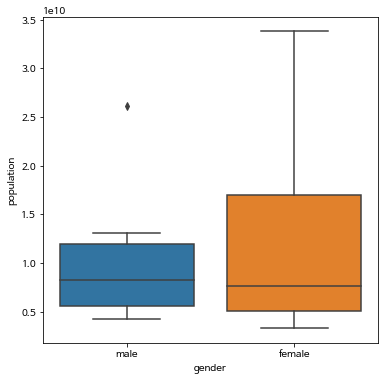

In [ ]:
male = [4247405887,4840715930,7615994614,8820235786,13045964711,26148178022]
female = [4430077942,3326873915,6910480609,8280222661,19842271285,33798831542]
gender = ['male', 'female']
gender = [gender[j] for j in range(2) for i in range(6)]
data = pd.DataFrame({'gender':gender, 'population':male+female})


plt.figure(figsize=(6,6))
sns.boxplot(x='gender', y='population', data=data)